In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
#flight = pd.read_csv("/downsampled_flight.csv")
flight = pd.read_csv("Fit.csv")
flight.sample(10)

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
8681,7.50,8.6,9.2,7.29,6.2,9.0,8.0,82.0,-15.0,7.9,...,0,0,0,0,0,0,0,1,0,0
2675,7.50,8.6,9.2,7.99,7.3,9.1,14.0,155.0,4.0,6.6,...,1,0,0,0,0,1,0,0,0,0
10137,7.99,7.3,9.1,8.27,7.8,9.0,-4.0,110.0,-23.0,7.9,...,0,0,0,1,0,0,0,1,0,0
622,7.50,8.6,9.2,7.99,7.3,9.1,15.0,132.0,-23.0,7.4,...,1,0,0,0,1,0,0,0,0,0
10823,7.50,8.6,9.2,7.99,7.3,9.1,15.0,145.0,-1.0,6.8,...,1,0,0,0,0,0,0,0,1,0
3492,7.29,6.2,9.0,7.99,7.3,9.1,6.0,105.0,-14.0,6.6,...,0,1,0,0,0,1,0,0,0,0
13880,7.00,8.5,8.7,7.99,7.3,9.1,9.0,121.0,-15.0,9.2,...,0,0,1,0,0,0,0,0,0,1
9675,7.99,7.3,9.1,8.27,7.8,9.0,11.0,109.0,-10.0,7.9,...,0,0,0,1,0,0,0,1,0,0
9038,7.00,8.5,8.7,7.99,7.3,9.1,18.0,0.0,-13.0,7.9,...,0,0,1,0,0,0,0,1,0,0
13358,7.29,6.2,9.0,7.99,7.3,9.1,15.0,112.0,2.0,9.2,...,0,1,0,0,0,0,0,0,0,1


In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   D_Airport Rating              14952 non-null  float64
 1   D_Airport On Time Rating      14952 non-null  float64
 2   D_Airport Service Rating      14952 non-null  float64
 3   A_Airport Rating              14952 non-null  float64
 4   A_Airport On Time Rating      14952 non-null  float64
 5   A_Airport Service Rating      14952 non-null  float64
 6   D_Delay                       14952 non-null  float64
 7   Duration                      14952 non-null  float64
 8   A_Delay                       14952 non-null  float64
 9   C_Rating                      14952 non-null  float64
 10  C_Market Share                14952 non-null  float64
 11  C_Load Factor                 14952 non-null  float64
 12  C_On Time Performance Rating  14952 non-null  float64
 13  D

#EDA

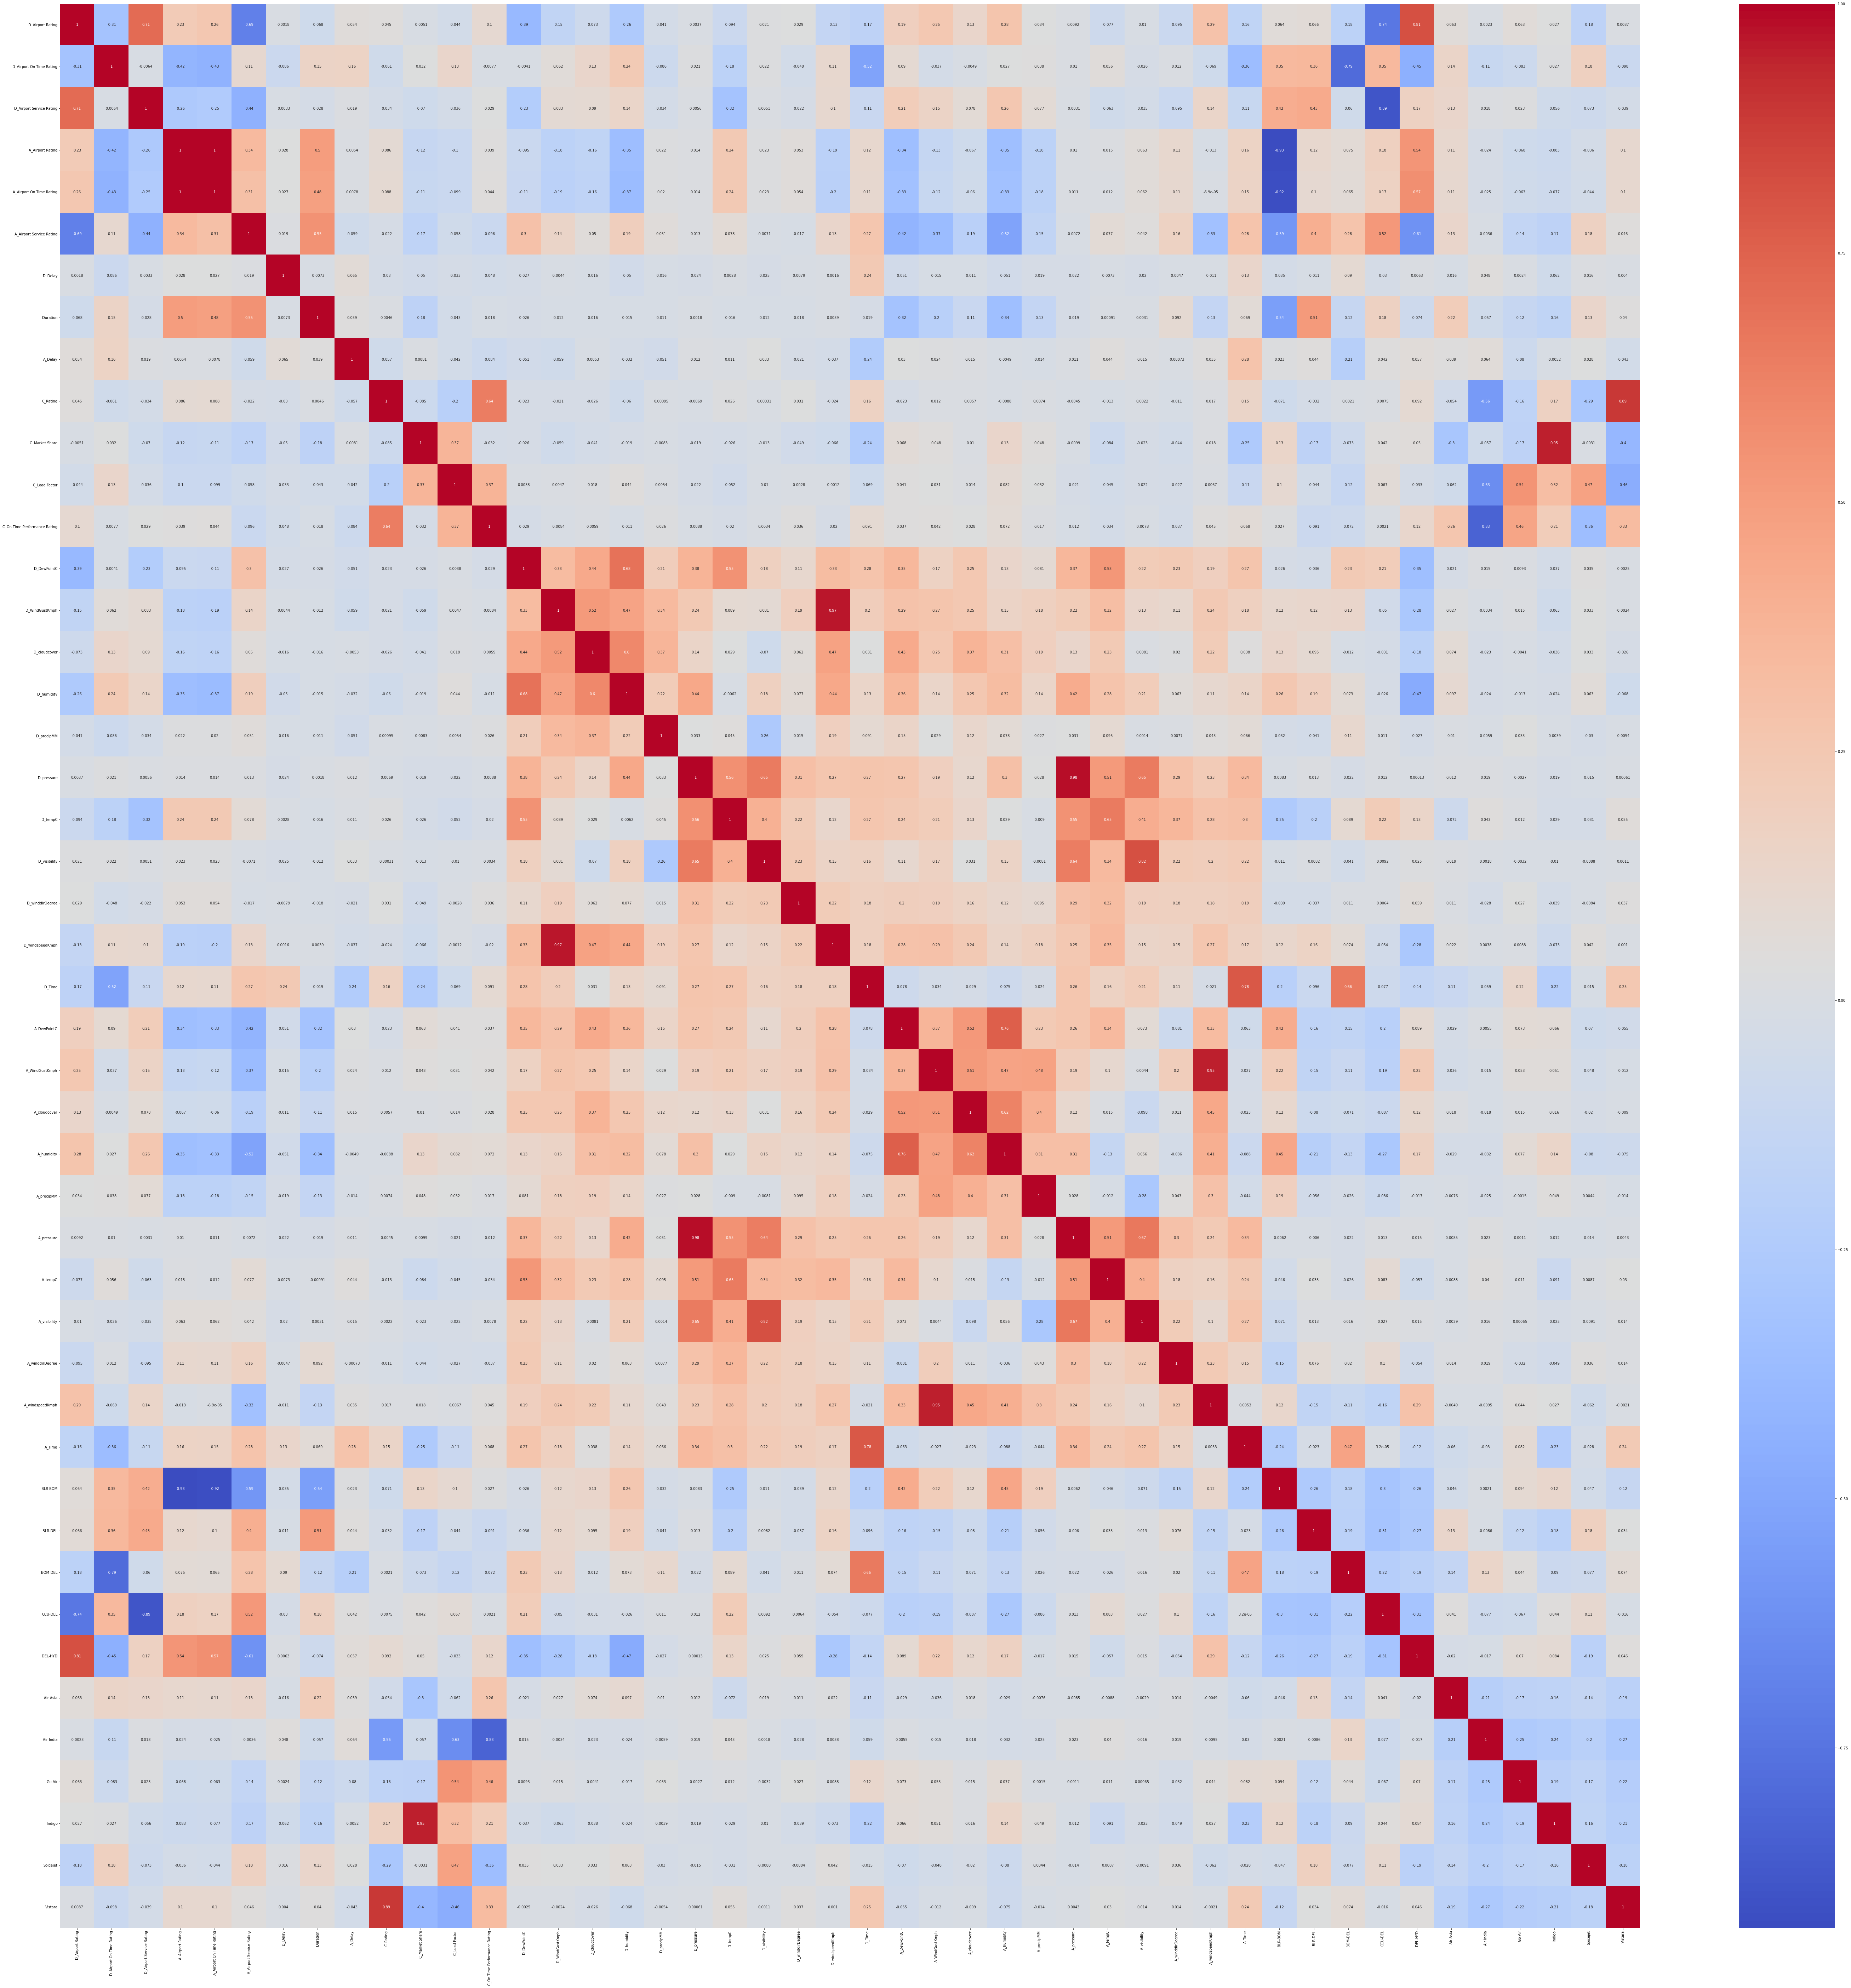

In [7]:
corrMatrix = flight.corr()

plt.figure(figsize=(100, 100)) 
sns.heatmap(corrMatrix, annot=True, fmt='.2g',cmap= 'coolwarm')

plt.show()

In [5]:
print(corrMatrix)

                              D_Airport Rating  D_Airport On Time Rating  \
D_Airport Rating                      1.000000                 -0.312822   
D_Airport On Time Rating             -0.312822                  1.000000   
D_Airport Service Rating              0.713565                 -0.006433   
A_Airport Rating                      0.226278                 -0.417117   
A_Airport On Time Rating              0.257267                 -0.426840   
A_Airport Service Rating             -0.693039                  0.105386   
D_Delay                               0.001762                 -0.086240   
Duration                             -0.067930                  0.154935   
A_Delay                               0.053964                  0.159106   
C_Rating                              0.044736                 -0.061110   
C_Market Share                       -0.005117                  0.031604   
C_Load Factor                        -0.043743                  0.129046   
C_On Time Pe

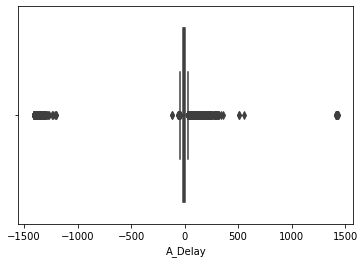

In [4]:
#Outliers in Arrival Delay
sns.boxplot(flight.A_Delay)

## Outlier Treatment using Inter Quartile Range

In [ ]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(flight,"A_Delay")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  34.0
Lower Whisker:  -46.0


In [ ]:
flight[(flight['A_Delay'] < lower) | (flight['A_Delay'] > upper)]

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
26,7.50,8.6,9.2,7.29,6.2,9.0,94.0,83.0,74.0,7.4,...,0,0,0,0,1,0,0,0,0,0
77,7.50,8.6,9.2,7.29,6.2,9.0,331.0,76.0,303.0,7.4,...,0,0,0,0,1,0,0,0,0,0
102,7.50,8.6,9.2,7.29,6.2,9.0,323.0,94.0,313.0,7.4,...,0,0,0,0,1,0,0,0,0,0
205,7.50,8.6,9.2,7.29,6.2,9.0,77.0,76.0,54.0,7.4,...,0,0,0,0,1,0,0,0,0,0
305,7.50,8.6,9.2,7.99,7.3,9.1,62.0,152.0,44.0,7.4,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14893,7.99,7.3,9.1,8.27,7.8,9.0,87.0,0.0,67.0,9.2,...,0,0,0,1,0,0,0,0,0,1
14921,7.99,7.3,9.1,8.27,7.8,9.0,107.0,110.0,77.0,9.2,...,0,0,0,1,0,0,0,0,0,1
14923,7.99,7.3,9.1,8.27,7.8,9.0,325.0,101.0,287.0,9.2,...,0,0,0,1,0,0,0,0,0,1
14934,7.99,7.3,9.1,8.27,7.8,9.0,74.0,107.0,42.0,9.2,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
new_flight = flight[(flight['A_Delay'] > lower) & (flight['A_Delay'] < upper)]

In [ ]:
print(len(flight))
print(len(new_flight))

14952
14127


In [ ]:
new_flight.reset_index(inplace = True)
new_flight

,index,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,...,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
0,0,7.50,8.6,9.2,7.29,6.2,9.0,8.0,79.0,-16.0,...,0,0,0,0,1,0,0,0,0,0
1,1,7.50,8.6,9.2,7.29,6.2,9.0,3.0,81.0,-20.0,...,0,0,0,0,1,0,0,0,0,0
2,2,7.50,8.6,9.2,7.29,6.2,9.0,2.0,90.0,-12.0,...,0,0,0,0,1,0,0,0,0,0
3,3,7.50,8.6,9.2,7.29,6.2,9.0,3.0,77.0,-23.0,...,0,0,0,0,1,0,0,0,0,0
4,4,7.50,8.6,9.2,7.29,6.2,9.0,15.0,78.0,-11.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14122,14947,7.99,7.3,9.1,8.27,7.8,9.0,27.0,114.0,2.0,...,0,0,0,1,0,0,0,0,0,1
14123,14948,7.99,7.3,9.1,8.27,7.8,9.0,17.0,103.0,-20.0,...,0,0,0,1,0,0,0,0,0,1
14124,14949,7.99,7.3,9.1,8.27,7.8,9.0,3.0,111.0,-26.0,...,0,0,0,1,0,0,0,0,0,1
14125,14950,7.99,7.3,9.1,8.27,7.8,9.0,25.0,113.0,-2.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#new_flight.to_csv('fit_no_outlier.csv')

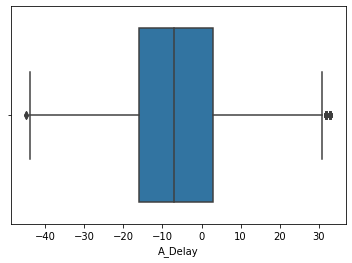

In [ ]:
#Airport Delay post Outlier Removal
sns.boxplot(new_flight.A_Delay)

#Modelling

In [ ]:
#Fetching the Independent variables

x = new_flight.drop(columns=['D_Delay','A_Delay','D_Time','A_Time'],axis=1)
x

,index,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,Duration,C_Rating,C_Market Share,...,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
0,0,7.50,8.6,9.2,7.29,6.2,9.0,79.0,7.4,4.0,...,0,0,0,0,1,0,0,0,0,0
1,1,7.50,8.6,9.2,7.29,6.2,9.0,81.0,7.4,4.0,...,0,0,0,0,1,0,0,0,0,0
2,2,7.50,8.6,9.2,7.29,6.2,9.0,90.0,7.4,4.0,...,0,0,0,0,1,0,0,0,0,0
3,3,7.50,8.6,9.2,7.29,6.2,9.0,77.0,7.4,4.0,...,0,0,0,0,1,0,0,0,0,0
4,4,7.50,8.6,9.2,7.29,6.2,9.0,78.0,7.4,4.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14122,14947,7.99,7.3,9.1,8.27,7.8,9.0,114.0,9.2,3.6,...,0,0,0,1,0,0,0,0,0,1
14123,14948,7.99,7.3,9.1,8.27,7.8,9.0,103.0,9.2,3.6,...,0,0,0,1,0,0,0,0,0,1
14124,14949,7.99,7.3,9.1,8.27,7.8,9.0,111.0,9.2,3.6,...,0,0,0,1,0,0,0,0,0,1
14125,14950,7.99,7.3,9.1,8.27,7.8,9.0,113.0,9.2,3.6,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14127 entries, 0 to 14126
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         14127 non-null  int64  
 1   D_Airport Rating              14127 non-null  float64
 2   D_Airport On Time Rating      14127 non-null  float64
 3   D_Airport Service Rating      14127 non-null  float64
 4   A_Airport Rating              14127 non-null  float64
 5   A_Airport On Time Rating      14127 non-null  float64
 6   A_Airport Service Rating      14127 non-null  float64
 7   Duration                      14127 non-null  float64
 8   C_Rating                      14127 non-null  float64
 9   C_Market Share                14127 non-null  float64
 10  C_Load Factor                 14127 non-null  float64
 11  C_On Time Performance Rating  14127 non-null  float64
 12  D_DewPointC                   14127 non-null  float64
 13  D

In [ ]:
#Checking Null values
pd.isnull(x).sum()

index                           0
D_Airport Rating                0
D_Airport On Time Rating        0
D_Airport Service Rating        0
A_Airport Rating                0
A_Airport On Time Rating        0
A_Airport Service Rating        0
Duration                        0
C_Rating                        0
C_Market Share                  0
C_Load Factor                   0
C_On Time Performance Rating    0
D_DewPointC                     0
D_WindGustKmph                  0
D_cloudcover                    0
D_humidity                      0
D_precipMM                      0
D_pressure                      0
D_tempC                         0
D_visibility                    0
D_winddirDegree                 0
D_windspeedKmph                 0
A_DewPointC                     0
A_WindGustKmph                  0
A_cloudcover                    0
A_humidity                      0
A_precipMM                      0
A_pressure                      0
A_tempC                         0
A_visibility  

In [ ]:
#Fetching the dependent variable i.e. Arrival Delay
y = new_flight['A_Delay']
y

0       -16.0
1       -20.0
2       -12.0
3       -23.0
4       -11.0
         ... 
14122     2.0
14123   -20.0
14124   -26.0
14125    -2.0
14126    -2.0
Name: A_Delay, Length: 14127, dtype: float64

In [ ]:
#x = flight.drop(columns=['D_Delay','A_Delay','D_Time','A_Time', 'KNN_PredictedValue','KNN_Probability_1','KNN_Probability_2'],axis=1)
#df.drop(df.iloc[:, 1:3], inplace=True, axis=1)

#flight_pca.drop(flight_pca.iloc[:, 0:43], inplace=True,axis=1)
#x_pca.head()

In [ ]:
#x = flight_pca.drop(columns=['A_Delay'],axis=1)
#x

##  Data Normalization

In [ ]:
from sklearn.preprocessing import minmax_scale
scld_x = minmax_scale(x)
scld_x_df = pd.DataFrame(scld_x,columns=[x.columns])
scld_x_df

scld_x_df = scld_x_df.drop(("index"), axis=1)

In [ ]:
# Train Test Split
train_x,test_x,train_y,test_y = train_test_split(scld_x_df,y,test_size = 0.3,random_state = 1)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(9888, 42)
(9888,)
(4239, 42)
(4239,)


## Linear Regression Model

In [ ]:
#Create Model Instance - Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(train_x,train_y)

LinearRegression()

In [ ]:
coefs = pd.DataFrame(
   lr.coef_,  columns=['Coefficients'], index=train_x.columns
)

coefs = coefs.sort_values(by='Coefficients', ascending=False)
coefs.head()

,Coefficients
C_On Time Performance Rating,3.477582e+14
C_Market Share,3.242309e+14
C_Rating,2.002208e+14
Spicejet,7.158029e+13
BLR-BOM,5.036454e+13


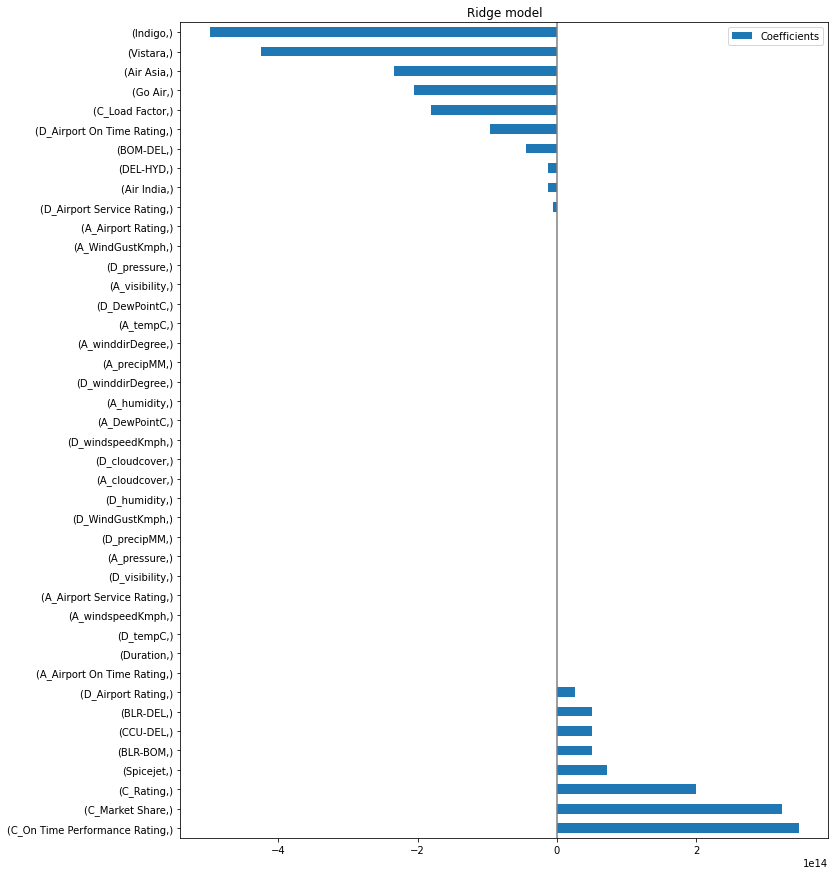

In [ ]:
#Co-efficient Plot
coefs.plot(kind='barh', figsize=(15,15))
plt.title('Ridge model')
#plt.xticks(rotation='vertical')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [ ]:
predict_delay = lr.predict(test_x)

In [ ]:
#For Test Data
print("R square value for regression test data is-")
np.round(lr.score(test_x,test_y)*100,2)

R square value for regression test data is-


27.47

In [ ]:
from  sklearn import metrics

print ("simple linear regression Mean square error (MSE) for TEST data is:")
np.round(metrics.mean_squared_error(test_y,predict_delay),2)

simple linear regression Mean square error (MSE) for TEST data is:


138.87

In [ ]:
from  sklearn.metrics import mean_absolute_error

print ("simple linear regression Mean absolute error (MAE) for TEST data is:")
np.round(metrics.mean_absolute_error(test_y,predict_delay),2)

simple linear regression Mean absolute error (MAE) for TEST data is:


9.12

In [ ]:
test_x

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,Duration,C_Rating,C_Market Share,C_Load Factor,...,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
10824,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.563310,0.076923,0.263158,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10228,0.393701,1.000000,1.0,0.530303,0.531401,0.526316,0.677966,0.076923,0.263158,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11516,0.393701,1.000000,1.0,0.000000,0.000000,0.000000,0.423729,1.000000,0.000000,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
897,0.393701,1.000000,1.0,0.742424,0.743961,0.736842,0.847109,0.307692,0.011080,0.399240,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8701,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.603190,0.500000,1.000000,0.771863,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11889,0.393701,1.000000,1.0,0.530303,0.531401,0.526316,0.832502,1.000000,0.000000,0.079848,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11707,0.393701,1.000000,1.0,0.000000,0.000000,0.000000,0.428714,1.000000,0.000000,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7416,0.779528,0.458333,0.8,0.742424,0.772947,0.000000,0.578265,0.230769,0.144044,0.954373,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11048,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.643071,0.076923,0.263158,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:

final_predict=pd.concat([test_x,test_y],axis = 1, join='outer')

predict_delay=lr.predict(test_x)
final_predict['Predicted']=np.round(predict_delay,1)
final_predict

,"(D_Airport Rating,)","(D_Airport On Time Rating,)","(D_Airport Service Rating,)","(A_Airport Rating,)","(A_Airport On Time Rating,)","(A_Airport Service Rating,)","(Duration,)","(C_Rating,)","(C_Market Share,)","(C_Load Factor,)",...,"(CCU-DEL,)","(DEL-HYD,)","(Air Asia,)","(Air India,)","(Go Air,)","(Indigo,)","(Spicejet,)","(Vistara,)",A_Delay,Predicted
10824,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.563310,0.076923,0.263158,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.00,-13.4
10228,0.393701,1.000000,1.0,0.530303,0.531401,0.526316,0.677966,0.076923,0.263158,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-15.00,-8.8
11516,0.393701,1.000000,1.0,0.000000,0.000000,0.000000,0.423729,1.000000,0.000000,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.00,-6.1
897,0.393701,1.000000,1.0,0.742424,0.743961,0.736842,0.847109,0.307692,0.011080,0.399240,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.15,5.2
8701,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.603190,0.500000,1.000000,0.771863,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-14.00,-19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11889,0.393701,1.000000,1.0,0.530303,0.531401,0.526316,0.832502,1.000000,0.000000,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.00,-0.1
11707,0.393701,1.000000,1.0,0.000000,0.000000,0.000000,0.428714,1.000000,0.000000,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.00,-4.5
7416,0.779528,0.458333,0.8,0.742424,0.772947,0.000000,0.578265,0.230769,0.144044,0.954373,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-4.00,-1.5
11048,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.643071,0.076923,0.263158,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.00,-7.3


###K-Fold CV (Linear Regression)

In [ ]:
# k-fold CV 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, train_x, train_y, scoring='r2', cv=5)
scores  

array([0.30617086, 0.2657289 , 0.27796224, 0.2737488 , 0.3033511 ])

## Neural Network Model

In [ ]:
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
#mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp = MLPRegressor(hidden_layer_sizes=(20,20,20), activation='relu', solver='adam', max_iter=500)
mlp.fit(train_x,train_y)

predict_train = mlp.predict(train_x)
predict_test = mlp.predict(test_x)
residuals = (test_y - predict_test)

In [ ]:
from  sklearn import metrics

print ("Neural Net Mean square error (MSE) for TEST data is:")
np.round(metrics.mean_squared_error(test_y,predict_test),2)

Neural Net Mean square error (MSE) for TEST data is:


97.81

In [ ]:
from  sklearn.metrics import mean_absolute_error

print ("Neural Net Mean absolute error (MAE) for TEST data is:")
np.round(metrics.mean_absolute_error(test_y,predict_test),2)

Neural Net Mean absolute error (MAE) for TEST data is:


7.51

In [ ]:
from  sklearn.metrics import mean_absolute_percentage_error

print ("Neural Net Mean absolute Percentage error (MAPE) for TEST data is:")
np.round(metrics.mean_absolute_percentage_error(test_y,predict_test),2)

Neural Net Mean absolute Percentage error (MAPE) for TEST data is:


575121899050389.6

In [ ]:
from  sklearn.metrics import mean_absolute_percentage_error

print ("Neural Net Mean absolute Percentage error (MAPE) for TRAIN data is:")
np.round(metrics.mean_absolute_percentage_error(train_y,predict_train),2)

Neural Net Mean absolute Percentage error (MAPE) for TRAIN data is:


609388194620159.0

In [ ]:
from sklearn.metrics import r2_score
print("R squared value",r2_score(test_y, predict_test))

R squared value 0.48913058297170253


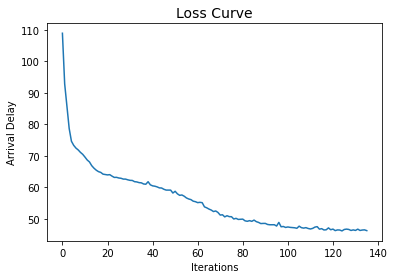

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Arrival Delay')
plt.show()



###K-fold for Neural Net

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [ ]:
# k-fold CV 
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(mlp, train_x, train_y, scoring='r2', cv=5)  

In [ ]:
r2_scores
print("R2 using K-Fold: ", max(r2_scores))

R2 using K-Fold:  0.5118084798290325


In [ ]:
MAE_scores = cross_val_score(mlp, train_x, train_y, scoring='neg_mean_absolute_error', cv=10)  

In [ ]:
print(MAE_scores)
print("MAE using K-Fold: ", -max(MAE_scores))

[-7.44148057 -7.4135842  -7.71248244 -7.15703057 -7.93265823 -8.92266667
 -7.62597976 -8.81863244 -7.32293087 -8.24531011]
MAE using K-Fold:  7.157030569148431


In [ ]:
final_predict_mlp= pd.concat([test_x,test_y], axis=1, join = "outer")

final_predict_mlp['Predicted']= np.round(predict_test,1)
final_predict_mlp['Residuals']= residuals
final_predict_mlp.head()

,"(D_Airport Rating,)","(D_Airport On Time Rating,)","(D_Airport Service Rating,)","(A_Airport Rating,)","(A_Airport On Time Rating,)","(A_Airport Service Rating,)","(Duration,)","(C_Rating,)","(C_Market Share,)","(C_Load Factor,)",...,"(DEL-HYD,)","(Air Asia,)","(Air India,)","(Go Air,)","(Indigo,)","(Spicejet,)","(Vistara,)",A_Delay,Predicted,Residuals
10824,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.563310,0.076923,0.263158,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.00,-16.6,20.627408
10228,0.393701,1.000000,1.0,0.530303,0.531401,0.526316,0.677966,0.076923,0.263158,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-15.00,-10.3,-4.725225
11516,0.393701,1.000000,1.0,0.000000,0.000000,0.000000,0.423729,1.000000,0.000000,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.00,0.6,-2.570379
897,0.393701,1.000000,1.0,0.742424,0.743961,0.736842,0.847109,0.307692,0.011080,0.399240,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.15,6.3,-1.172631
8701,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.603190,0.500000,1.000000,0.771863,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-14.00,-22.8,8.814738


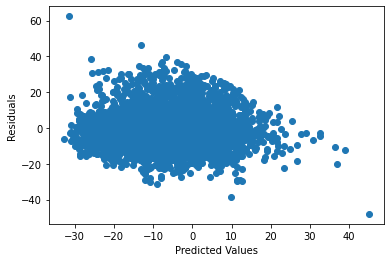

In [ ]:
# Residuals v/s Predicted Values plot
plt.scatter(final_predict_mlp['Predicted'], final_predict_mlp['Residuals'])
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# To show the plot
plt.show()

##Explainable AI using LIME

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 21.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ca43613b05abf063cfa7b050c230106e09611e2c047b32b6cc4bbfff99371173
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime import lime_tabular

In [ ]:
# list(data) or
#feature_names = list(x.columns)
feature_names_list = list(x.columns.values)
type(feature_names_list)
#my_array = np.array(feature_names_list)
feature_names_list
#print("Type",type(my_array))

['index',
 'D_Airport Rating',
 'D_Airport On Time Rating',
 'D_Airport Service Rating',
 'A_Airport Rating',
 'A_Airport On Time Rating',
 'A_Airport Service Rating',
 'Duration',
 'C_Rating',
 'C_Market Share',
 'C_Load Factor',
 'C_On Time Performance Rating',
 'D_DewPointC',
 'D_WindGustKmph',
 'D_cloudcover',
 'D_humidity',
 'D_precipMM',
 'D_pressure',
 'D_tempC',
 'D_visibility',
 'D_winddirDegree',
 'D_windspeedKmph',
 'A_DewPointC',
 'A_WindGustKmph',
 'A_cloudcover',
 'A_humidity',
 'A_precipMM',
 'A_pressure',
 'A_tempC',
 'A_visibility',
 'A_winddirDegree',
 'A_windspeedKmph',
 'BLR-BOM',
 'BLR-DEL',
 'BOM-DEL',
 'CCU-DEL',
 'DEL-HYD',
 'Air Asia',
 'Air India',
 'Go Air',
 'Indigo',
 'Spicejet',
 'Vistara']

In [ ]:
type(train_x.to_numpy())

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(train_x.to_numpy(), mode="regression", feature_names= feature_names_list)
explainer

In [ ]:
#final_predict_mlp= pd.concat([test_x,test_y], axis=1, join = "outer")
df1 = pd.concat([test_x,test_y], axis=1, join = "outer")
df1
df1_sort = df1.sort_values(by="A_Delay",ascending=False )
df1_sort.reset_index(inplace = True)
df1_sort.head(5)

,index,"(D_Airport Rating,)","(D_Airport On Time Rating,)","(D_Airport Service Rating,)","(A_Airport Rating,)","(A_Airport On Time Rating,)","(A_Airport Service Rating,)","(Duration,)","(C_Rating,)","(C_Market Share,)",...,"(BOM-DEL,)","(CCU-DEL,)","(DEL-HYD,)","(Air Asia,)","(Air India,)","(Go Air,)","(Indigo,)","(Spicejet,)","(Vistara,)",A_Delay
0,3308,0.228346,0.000000,0.6,0.530303,0.531401,0.526316,0.533400,0.000000,0.232687,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33.0
1,12702,0.228346,0.000000,0.6,0.530303,0.531401,0.526316,0.548355,1.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0
2,1436,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.633101,0.307692,0.011080,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,33.0
3,3709,0.228346,0.000000,0.6,0.530303,0.531401,0.526316,0.508475,0.000000,0.232687,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33.0
4,2690,0.393701,1.000000,1.0,0.530303,0.531401,0.526316,0.707876,0.000000,0.232687,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33.0


In [ ]:
#new_flight.drop(columns=['D_Delay','A_Delay','D_Time','A_Time'],axis=1)
test_x = df1_sort.drop(columns=["A_Delay","index"],axis=1)
test_y = df1_sort["A_Delay"]
test_x

,"(D_Airport Rating,)","(D_Airport On Time Rating,)","(D_Airport Service Rating,)","(A_Airport Rating,)","(A_Airport On Time Rating,)","(A_Airport Service Rating,)","(Duration,)","(C_Rating,)","(C_Market Share,)","(C_Load Factor,)",...,"(BLR-DEL,)","(BOM-DEL,)","(CCU-DEL,)","(DEL-HYD,)","(Air Asia,)","(Air India,)","(Go Air,)","(Indigo,)","(Spicejet,)","(Vistara,)"
0,0.228346,0.000000,0.6,0.530303,0.531401,0.526316,0.533400,0.000000,0.232687,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.228346,0.000000,0.6,0.530303,0.531401,0.526316,0.548355,1.000000,0.000000,0.079848,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.633101,0.307692,0.011080,0.399240,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.228346,0.000000,0.6,0.530303,0.531401,0.526316,0.508475,0.000000,0.232687,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.393701,1.000000,1.0,0.530303,0.531401,0.526316,0.707876,0.000000,0.232687,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,0.393701,1.000000,1.0,0.000000,0.000000,0.000000,0.368893,0.500000,1.000000,0.771863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4235,0.000000,0.958333,0.0,0.530303,0.531401,0.526316,0.538385,0.076923,0.263158,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4236,0.393701,1.000000,1.0,0.000000,0.000000,0.000000,0.363908,0.500000,1.000000,0.771863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4237,0.393701,1.000000,1.0,0.000000,0.000000,0.000000,0.378863,0.500000,1.000000,0.771863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import random
idx = random.randint(1, len(test_x))

#print(idx)
#print(test_y.iloc[idx,])
#test_y.A_Delay[idx]
print("Prediction random : ",idx, " ", mlp.predict(np.array(test_x.iloc[idx,]).reshape(1,-1)))
print("Actual random:     ", test_y.iloc[idx,])

print("Prediction : ", mlp.predict(np.array(test_x.iloc[1,]).reshape(1,-1)))
print("Actual :     ", test_y.iloc[1,])

print("Prediction : ", mlp.predict(np.array(test_x.iloc[542,]).reshape(1,-1)))
print("Actual :     ", test_y.iloc[542,])



Prediction random :  2318   [0.63372222]
Actual random:      -8.0
Prediction :  [12.0130996]
Actual :      33.0
Prediction :  [5.44104267]
Actual :      10.0


In [ ]:
#explanation = explainer.explain_instance(np.array(test_x.iloc[idx,]), mlp.predict, num_features=len(feature_names_list))
explanation = explainer.explain_instance(np.array(test_x.iloc[1,]), mlp.predict, num_features=len(feature_names_list))
explanation

In [ ]:
#Explanation of BLR-DEL SpiceJet flight
explanation.show_in_notebook()

In [ ]:
explanation = explainer.explain_instance(np.array(test_x.iloc[542,]), mlp.predict, num_features=len(feature_names_list))
explanation

In [ ]:
explanation.show_in_notebook()

<Figure size 720x1440 with 0 Axes>

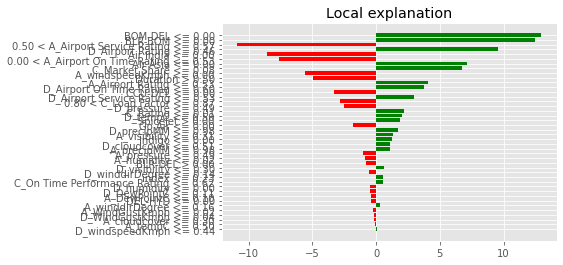

In [ ]:
import matplotlib.pyplot as plt

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(20)

with plt.style.context("ggplot"):
  #plt.figure(figsize=(15,12)) 
  explanation.as_pyplot_figure()
  #fig.savefig('lime_report.jpg')

explanation.save_to_file('lime_report.html')

In [ ]:
explanation.as_list()

[('BOM-DEL <= 0.00', 12.403297055766492),
 ('BLR-BOM <= 0.00', 12.312043943269082),
 ('0.50 < A_Airport Service Rating <= 0.57', -10.848953242290706),
 ('D_Airport Rating <= 0.46', 10.02948530787285),
 ('0.00 < A_Airport On Time Rating <= 0.53', -7.8219591952428305),
 ('C_Market Share <= 0.08', 7.231884556694723),
 ('Air India <= 0.00', -7.046650851476836),
 ('Air Asia <= 0.00', 7.01688411589509),
 ('A_windspeedKmph <= 0.00', -5.739618813769921),
 ('D_Airport On Time Rating <= 0.60', 4.110188141866969),
 ('A_Airport Rating <= 0.53', 3.9094603228313383),
 ('Duration > 0.50', -3.727810912671032),
 ('Go Air <= 0.00', -3.4383886490169093),
 ('C_Rating <= 0.01', 3.12688038039542),
 ('D_Airport Service Rating <= 0.53', 3.1198552102882227),
 ('0.80 < C_Load Factor <= 0.87', -3.10421358927866),
 ('CCU-DEL <= 0.00', -2.8027128044482943),
 ('Spicejet > 0.00', 2.0985027648432646),
 ('D_WindGustKmph <= 0.04', -1.8123553976500084),
 ('D_pressure <= 0.49', -1.784099686819733),
 ('D_precipMM <= 0.98'

In [ ]:
print("Explanation Local Prediction  : ", explanation.local_pred)
print("Explanation Global Prediction : ", explanation.predicted_value)

Explanation Local Prediction  :  [12.31293768]
Explanation Global Prediction :  12.013099597695971
